# LOAD NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay

# LOADING DATASET INTO DATAFRAME

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# FINDING MISSING VALUES

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# DROPING THE VALUES

In [ ]:
df.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


# CHECKING THE DATATYPE

In [ ]:
df.dtypes


,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object


CONVERTING CATEGORICAL TO NUMERIC USING LABEL ENCORDING

In [ ]:
encoder=LabelEncoder()
df["Sex"]=encoder.fit_transform(df["Sex"])
df["Embarked"]=encoder.fit_transform(df["Embarked"])


In [ ]:
df.dtypes

,0
Survived,int64
Pclass,int64
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,int64


In [ ]:
df.dropna(inplace=True)

# BOX PLOT

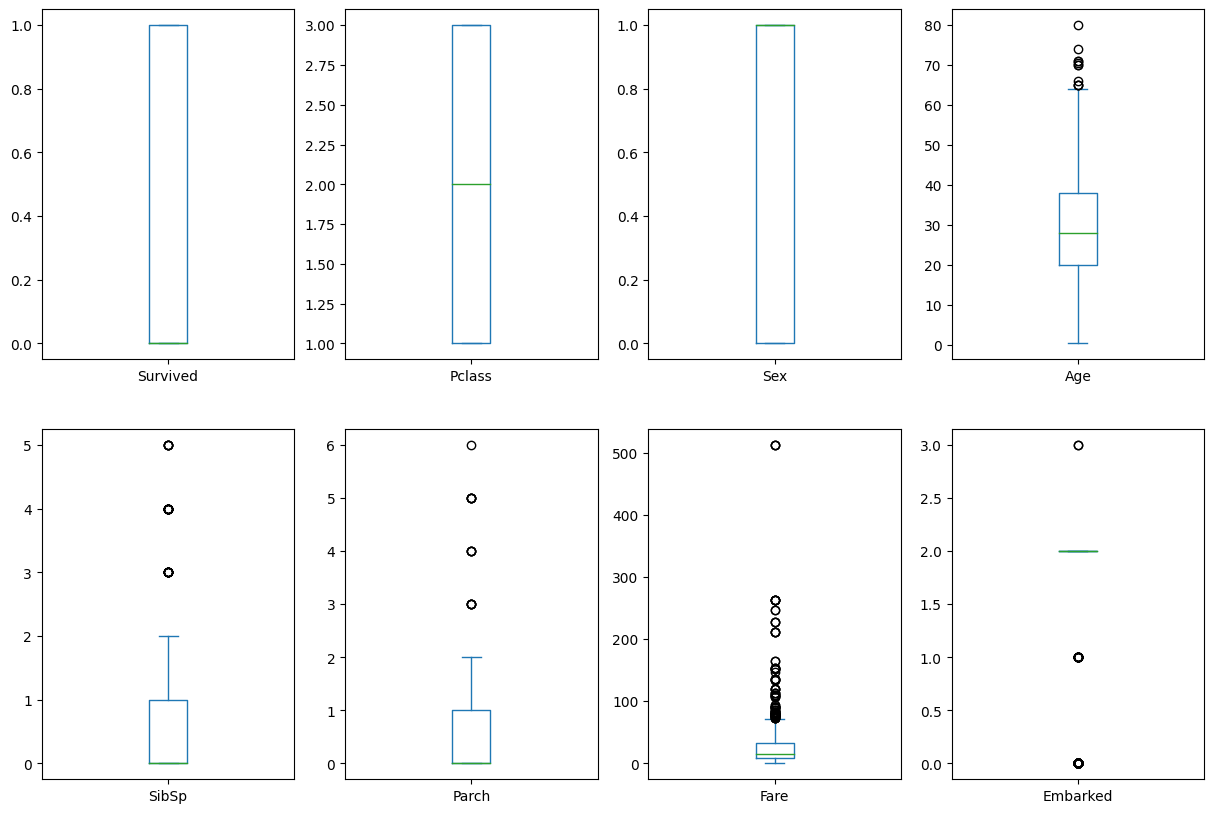

In [ ]:
df.plot(kind='box', subplots=True, layout=(2,4), figsize=(15, 10))
plt.show()

# REMOVING THE OUTLIERS USING ZSCORE

In [ ]:
outliers=['Age','SibSp','Parch','Fare','Embarked']
for i in outliers:
  z=np.abs(stats.zscore(df[i]))
  threshold=2
  outlier=df[z > threshold]
  df.drop(outlier.index,inplace=True)

  print(np.where(z>3))

(array([498, 679]),)
(array([ 15,  35,  42,  49,  52,  89, 127, 131, 139, 181, 202, 206, 214,
       297, 369, 413, 414, 517, 519, 601, 623, 633, 650]),)
(array([ 11,  19,  54, 116, 257, 316, 406, 437, 457, 486, 531, 561, 622,
       645]),)
(array([ 74, 180, 208, 215, 263, 266, 477, 483, 491, 505, 516, 521, 523,
       552]),)
(array([], dtype=int64),)


# SEPERATING VARIABLES

In [ ]:
X=df.drop(['Survived'],axis=1)
y=df['Survived']

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
6,1,1,54.0,0,0,51.8625,2
...,...,...,...,...,...,...,...
883,2,1,28.0,0,0,10.5000,2
884,3,1,25.0,0,0,7.0500,2
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2


In [ ]:
y

,Survived
0,0
2,1
3,1
4,0
6,0
...,...
883,0
884,0
886,0
887,1


# SCALING THE ATTRIBUTES

In [ ]:
scaler=StandardScaler()
X_sc=scaler.fit_transform(X)

# SPLITTING THE DATASET INTO TRAINING AND TESTING

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.3,random_state=1)

# CREATING MODELS AND CHECKING PERFORMANCE

In [ ]:
knn=KNeighborsClassifier()
svc=SVC()
dtc=DecisionTreeClassifier(random_state=1)
gnb=GaussianNB()
rf=RandomForestClassifier(random_state=1)
gbc=GradientBoostingClassifier(random_state=1)
ada=AdaBoostClassifier(random_state=1)


KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        84
           1       0.78      0.70      0.74        67

    accuracy                           0.78       151
   macro avg       0.78      0.77      0.78       151
weighted avg       0.78      0.78      0.78       151

78.1456953642384
**********************************************************************
SVC()
              precision    recall  f1-score   support

           0       0.75      0.95      0.84        84
           1       0.91      0.61      0.73        67

    accuracy                           0.80       151
   macro avg       0.83      0.78      0.79       151
weighted avg       0.82      0.80      0.79       151

80.13245033112582
**********************************************************************
DecisionTreeClassifier(random_state=1)
              precision    recall  f1-score   support

           0       0.76      0.75      0.75   

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


**********************************************************************


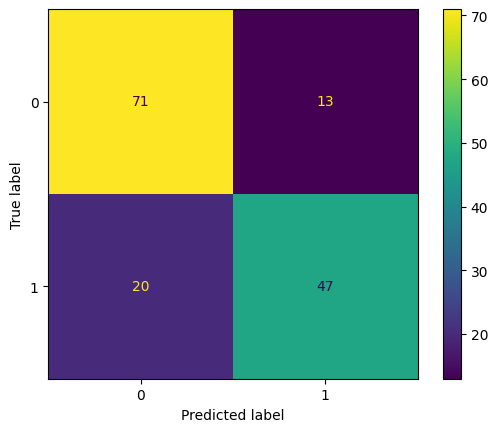

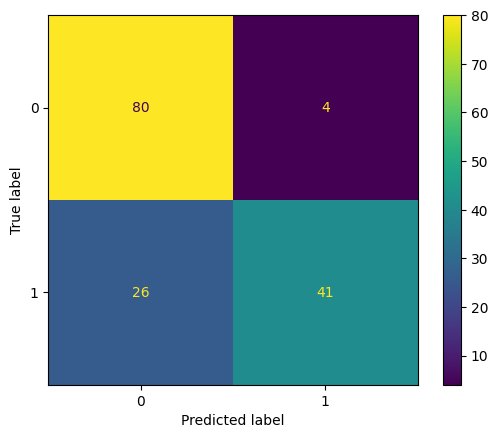

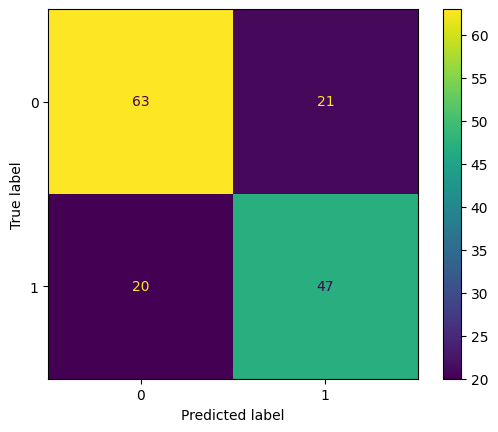

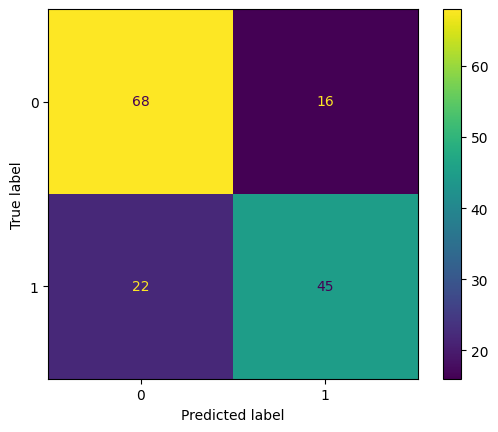

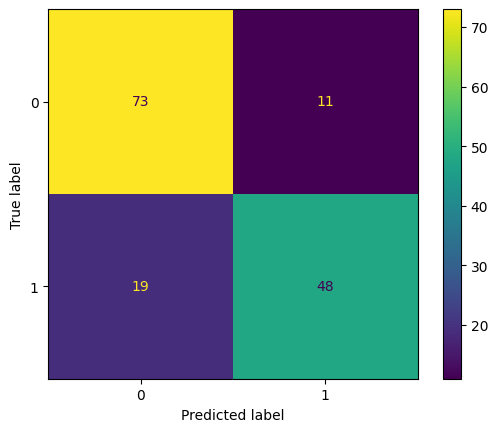

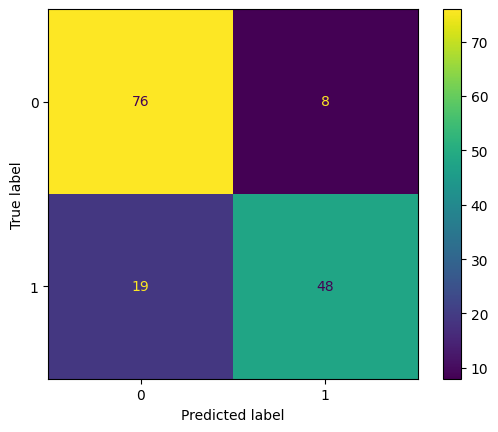

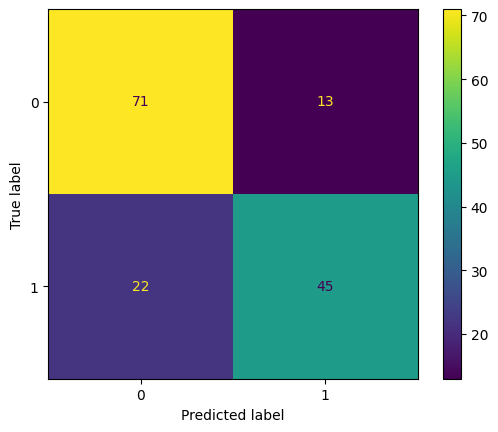

In [ ]:
models=[knn,svc,dtc,gnb,rf,gbc,ada]
for model in models:
  model.fit(X_train,y_train)
  ypred=model.predict(X_test)
  print(model)
  print(classification_report(y_test,ypred))
  print(accuracy_score(y_test,ypred)*100)
  print(ConfusionMatrixDisplay.from_predictions(y_test,ypred))
  print("*"*70)

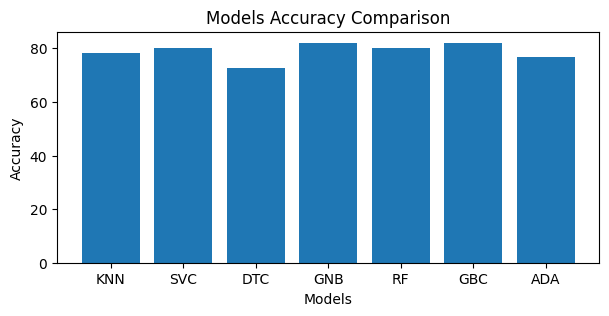

In [ ]:
model=["KNN","SVC","DTC","GNB","RF","GBC","ADA"]
accuracy=[78.14,80.13,72.84,82.11,80.13,82.11,76.82]
plt.figure(figsize=(7,3))
plt.bar(model,accuracy)
plt.title("Models Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.336464,-0.542878,-0.124959,0.096547,0.295306,0.318481,0.009330
Pclass,-0.336464,1.000000,0.149921,-0.301158,-0.163472,-0.111320,-0.687500,-0.112759
Sex,-0.542878,0.149921,1.000000,0.085677,-0.130872,-0.276990,-0.184775,0.073285
Age,-0.124959,-0.301158,0.085677,1.000000,-0.061719,-0.256659,0.130991,0.022188
SibSp,0.096547,-0.163472,-0.130872,-0.061719,1.000000,0.257766,0.380988,0.024172
Parch,0.295306,-0.111320,-0.276990,-0.256659,0.257766,1.000000,0.281266,0.052633
Fare,0.318481,-0.687500,-0.184775,0.130991,0.380988,0.281266,1.000000,0.069070
Embarked,0.009330,-0.112759,0.073285,0.022188,0.024172,0.052633,0.069070,1.000000


<Axes: >

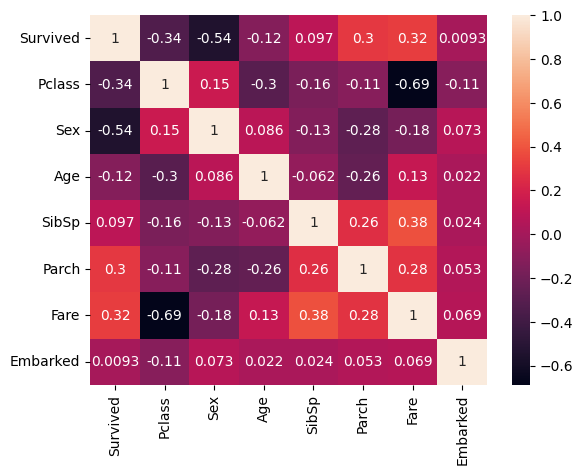

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
y_new=gnb.predict(scaler.transform([[3,1,22.0,1,0,7.2500,2]]))
result=y_new.item()
if result==0:
  print("NOT SURVIVED")
else:
  print("SURVIVED")

NOT SURVIVED


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
